In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, NMF
from sklearn.neighbors import NearestNeighbors
from sklearn.exceptions import ConvergenceWarning
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from skfuzzy.cluster import cmeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score


%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
#import dataset
df=pd.read_csv('ethiopic_MNIST_sample.csv') 
df_copy = df.copy()
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
# move label column to the first column
def move_column(df, col, pos):
    cols = df.columns.tolist()
    cols.insert(pos, cols.pop(cols.index(col)))
    return df[cols]

df = move_column(df, 'label', 0)
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check for missing values, actually this dataset don't have any missing values
(df.isnull().sum()).sum()

0

### Average image of each pre-assigned label

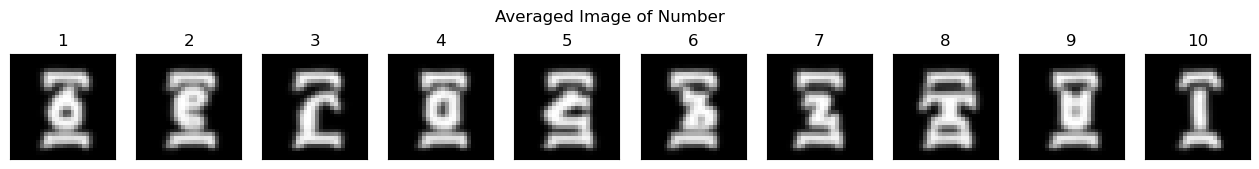

In [5]:
df_item_averages=df_copy.groupby(['label']).mean()

num_list=df['label'].drop_duplicates()
num_list

#Set up the plot
i=0
fig, ax = plt.subplots(1, 10, figsize=(16, 2))
plt.suptitle('Averaged Image of Number')

for num in sorted(list(num_list)):
    #First, reshape the flattened 784 pixel array into an 28-by-28 numpy array and unscale the data (ie. multiply by 255)
    object_image = np.array(df_item_averages.loc[num]).reshape((28, 28))*255

    #Then show the image
    ax[i].imshow(object_image, cmap='gray')
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(num))
    
    i+=1
plt.show()

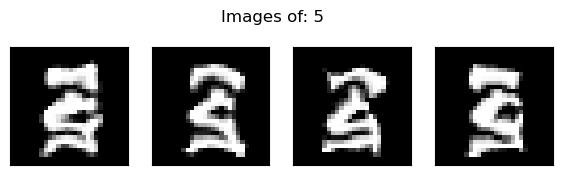

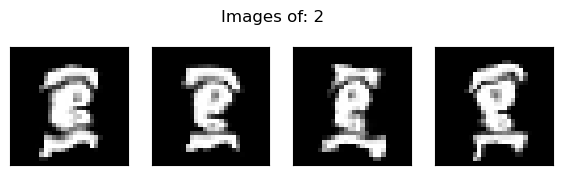

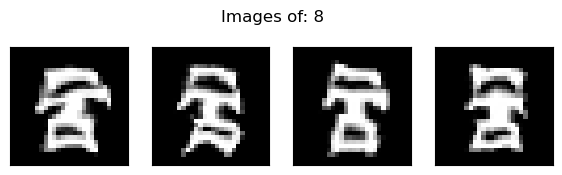

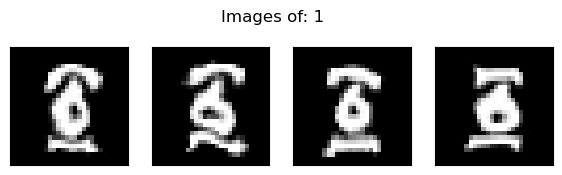

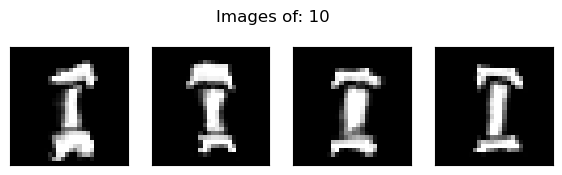

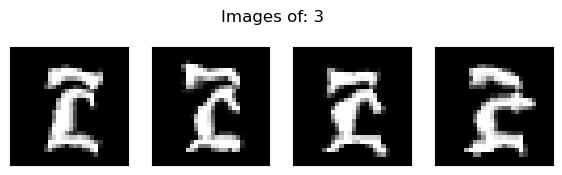

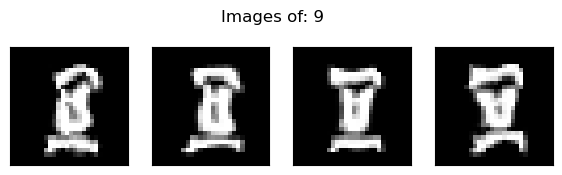

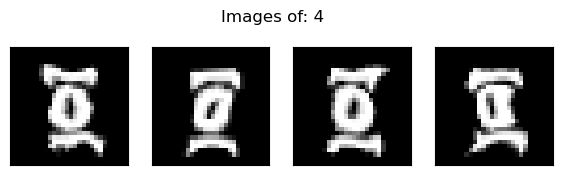

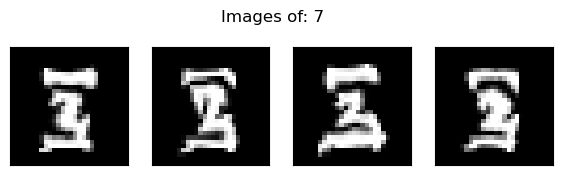

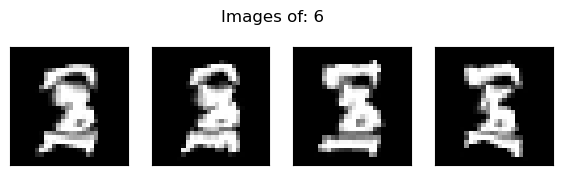

In [6]:
num_list=df['label'].drop_duplicates()
num_list

X_original=df.copy().drop(['label'], axis=1)/255 

for num in num_list:
    df_item_subset=X_original[df['label']==num]
    
    fig, ax = plt.subplots(1, 4, figsize=(7, 2)) 
    plt.suptitle('Images of: '+ str(num))  
    
    #Visualize the first four images that are of this number item
    for i in range(0,4):
        object_image = np.array(df_item_subset.iloc[i]).reshape((28, 28))*255
        
        ax[i].imshow(object_image, cmap='gray')
        ax[i].grid(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

In [7]:
# scaling the dataset, df/255
X_original=df.copy().drop(['label'], axis=1)/255  # variable scaling 
X_original.head()

X_complete = pd.concat([df["label"], X_original], axis=1)  # add back "label" column 
X_complete.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#t-SNE plot

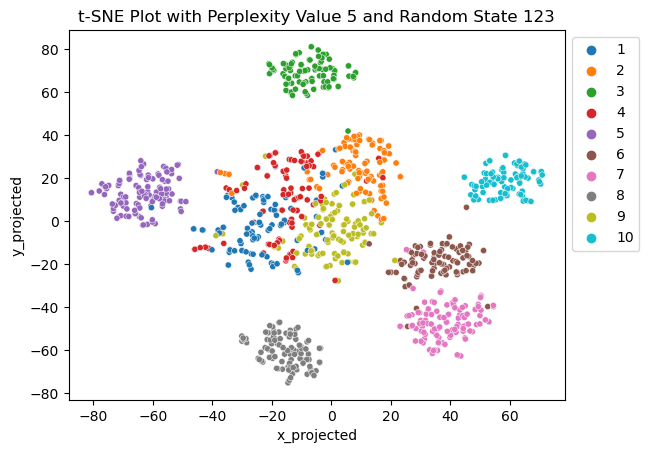

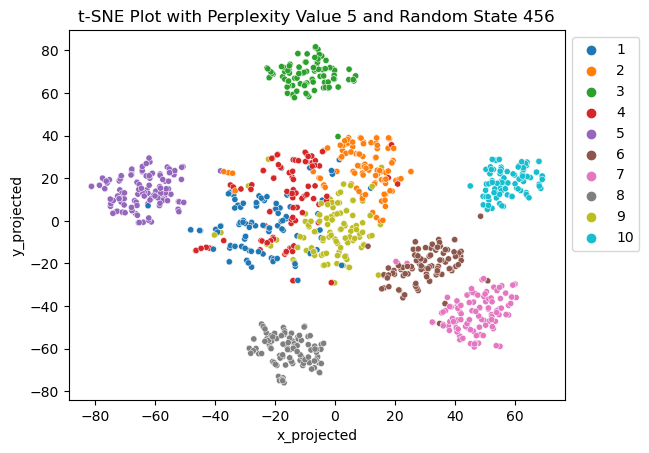

--------------------------------------------


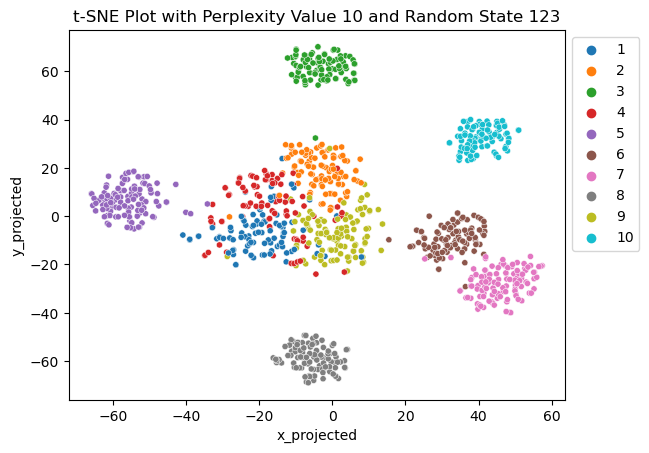

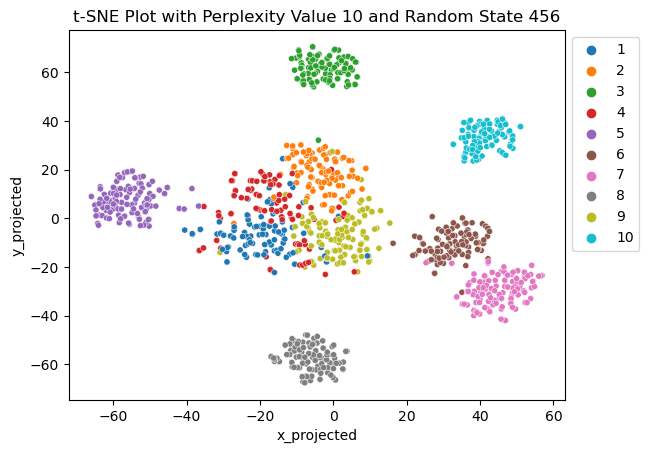

--------------------------------------------


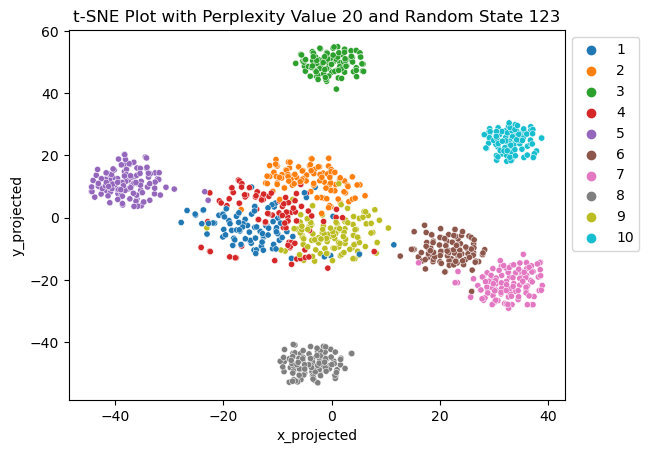

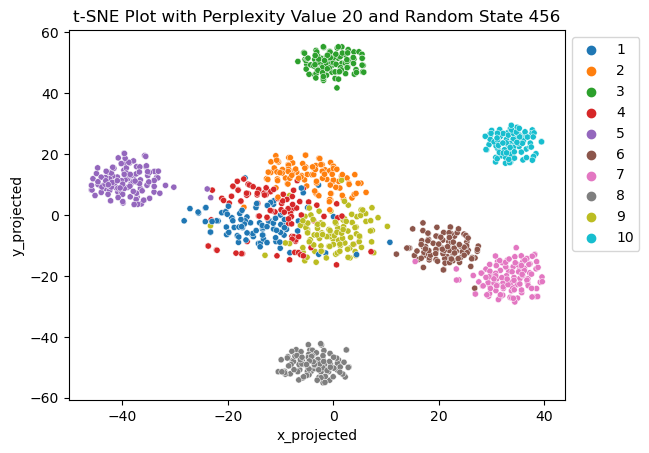

--------------------------------------------


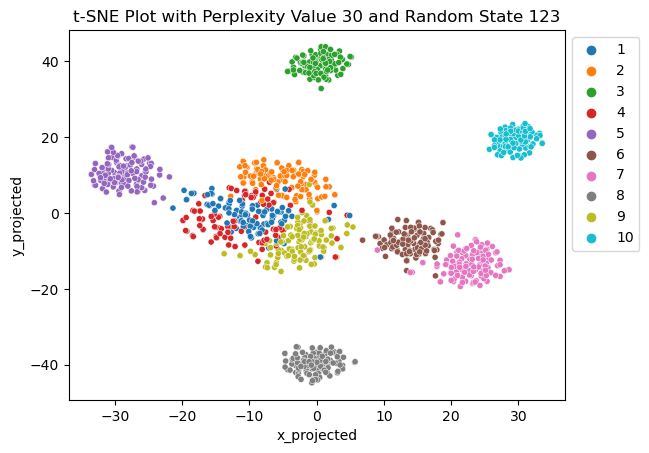

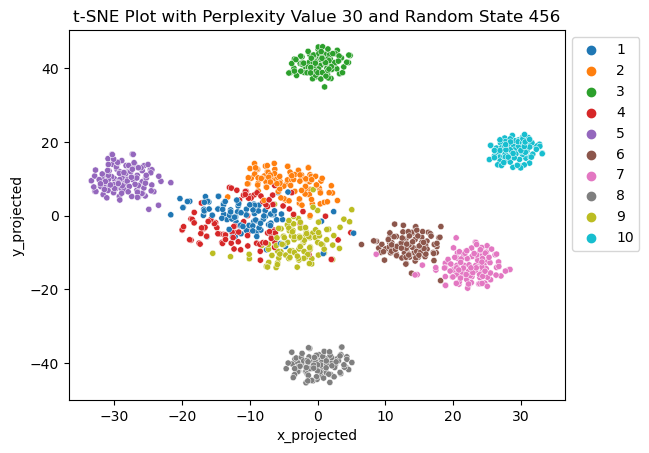

--------------------------------------------


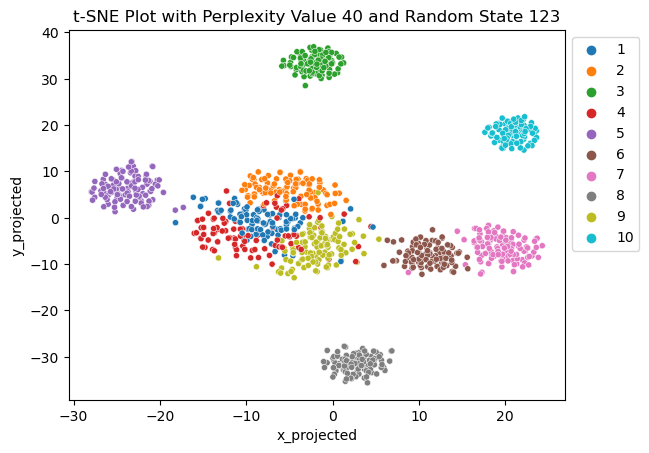

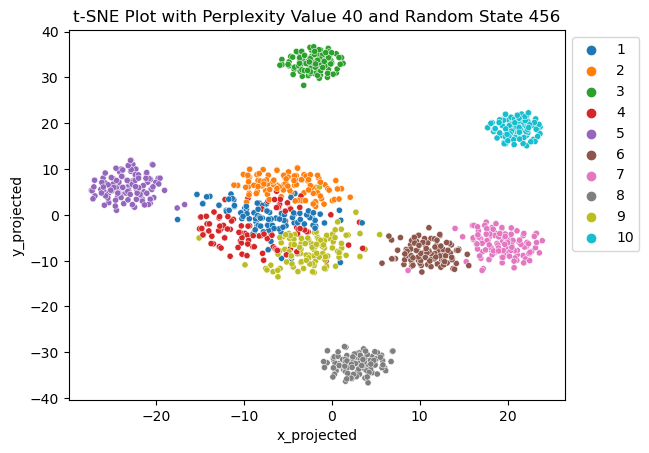

--------------------------------------------


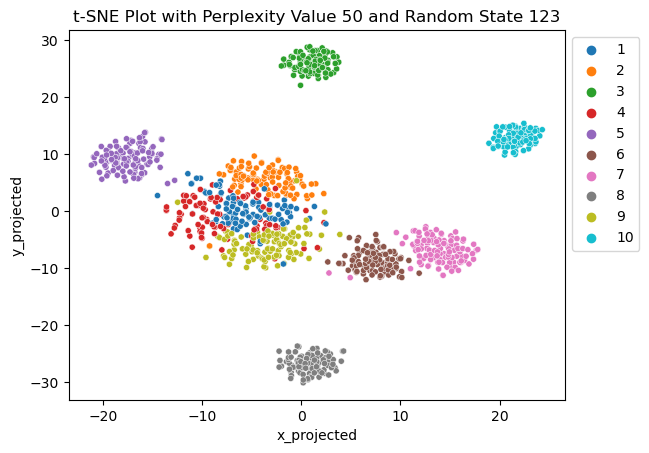

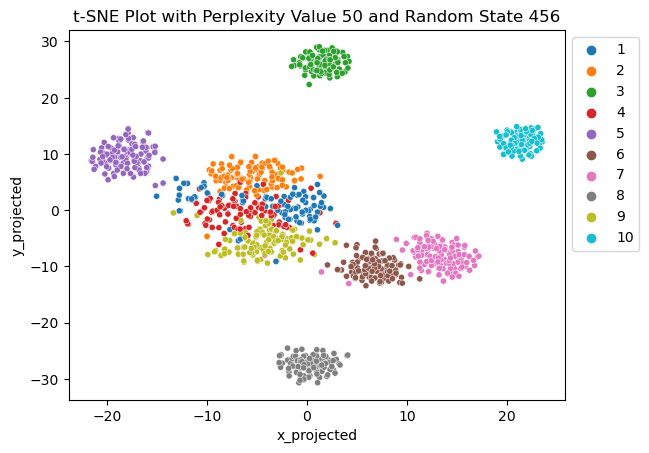

--------------------------------------------


In [9]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [123,456]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X_original)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([X_complete, df_tsne], axis=1)
        palette = sns.color_palette("tab10")
        sns.scatterplot(x='x_projected',y='y_projected', hue='label', data=df_combo, s=20, alpha=1, palette=palette)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

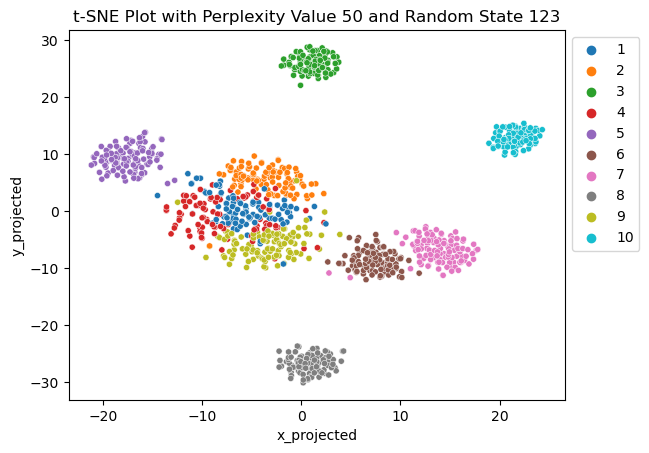

In [10]:
# Choose one t-SNE plot
perplexity = 50
random_state = 123

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
data_tsne = tsne.fit_transform(X_original)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([X_complete, df_tsne], axis=1)
palette = sns.color_palette("tab10")
sns.scatterplot(x='x_projected',y='y_projected', hue='label', data=df_combo, s=20, alpha=1, palette=palette)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 123))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### clustering Algorithm 1: fuzzy c-means

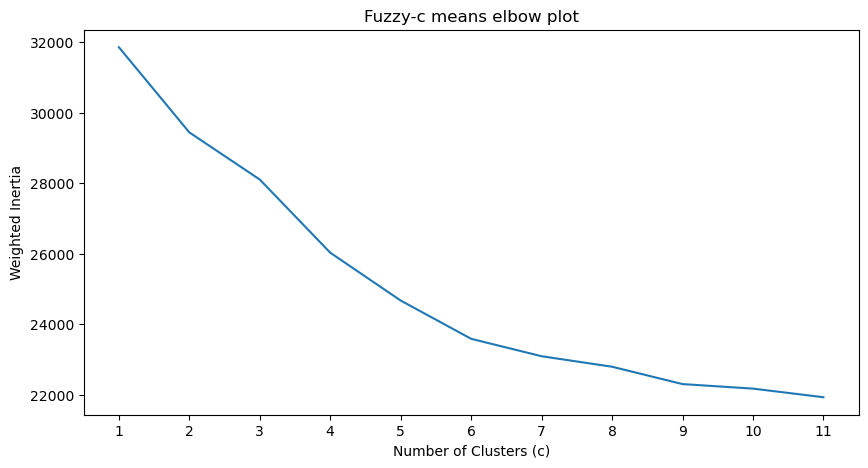

In [11]:
# elbow plot
results = []
cs = range(1, 12) 

for c in cs:
    centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(
        X_original.T, c=c, m=1.01, error=1e-6, maxiter=20000, seed=100
    )
    results.append(history[-1]) 

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cs, results)
plt.title('Fuzzy-c means elbow plot')
plt.xlabel('Number of Clusters (c)')
plt.ylabel('Weighted Inertia')
plt.xticks(cs)  
plt.show()

#### There is an elbow at k=6. So I will choose 6 clusters for this dataset.

### Now select fuzzy partition value (p value)
Given the objectives of this analysis, we have chosen to employ the Fuzzy c-Means clustering method with c = 6 clusters and a fuzzifier value of p = 1.05. Although insights could potentially be derived from a variety of p-values, the selection of p = 1.05 for the fuzzy clustering approach is particularly beneficial. This setting enables the classification of objects with relatively definite membership in most cases, effectively reflecting the uncertainty of "cross-node" cluster assignments. Additionally, it provides deeper insights into which clusters are more complex compared to others.

##### p = 1.01

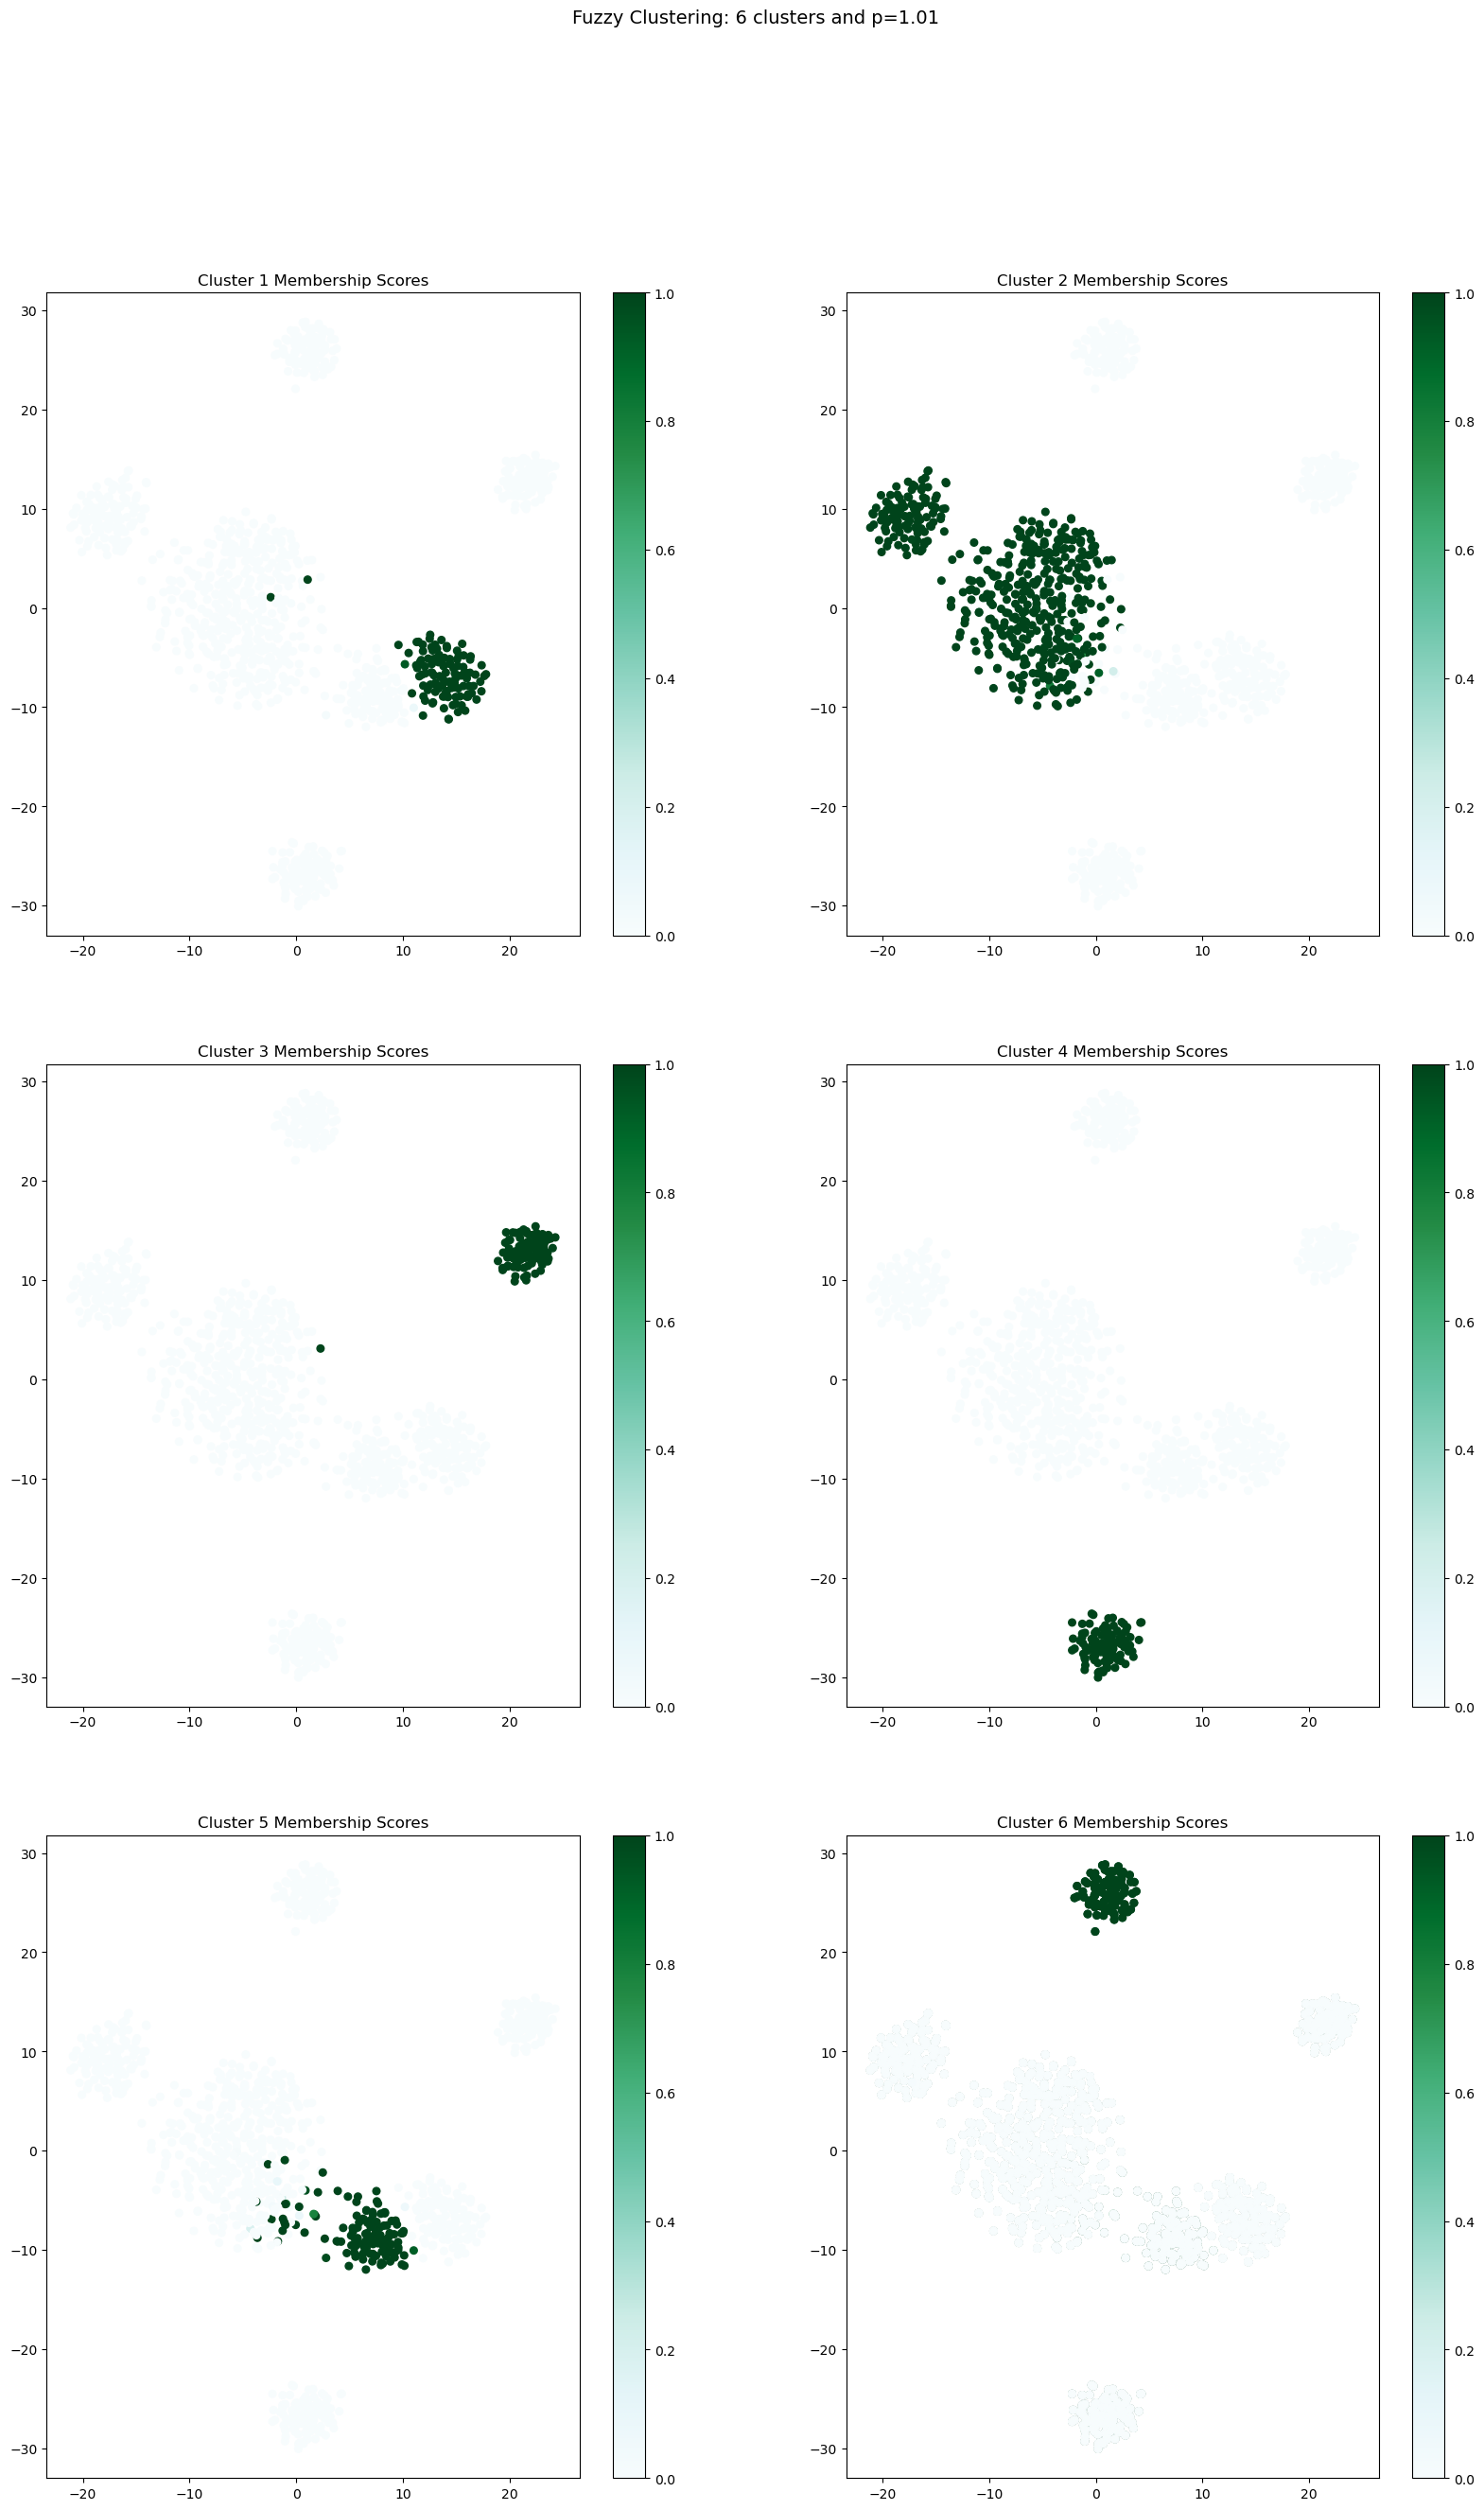

In [13]:
c=6
p=1.01

centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(X_original.T, c=c, m=p, error=1e-6, maxiter=20000, seed=123)

#Color code t-SNE Plots
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,6):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/2)),int(i%2)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/2)),int(i%2)])
    ax[int(np.floor(i/2)),int(i%2)].set_title('Cluster %s Membership Scores'%(str(i+1)))
plt.show()

##### p = 1.05

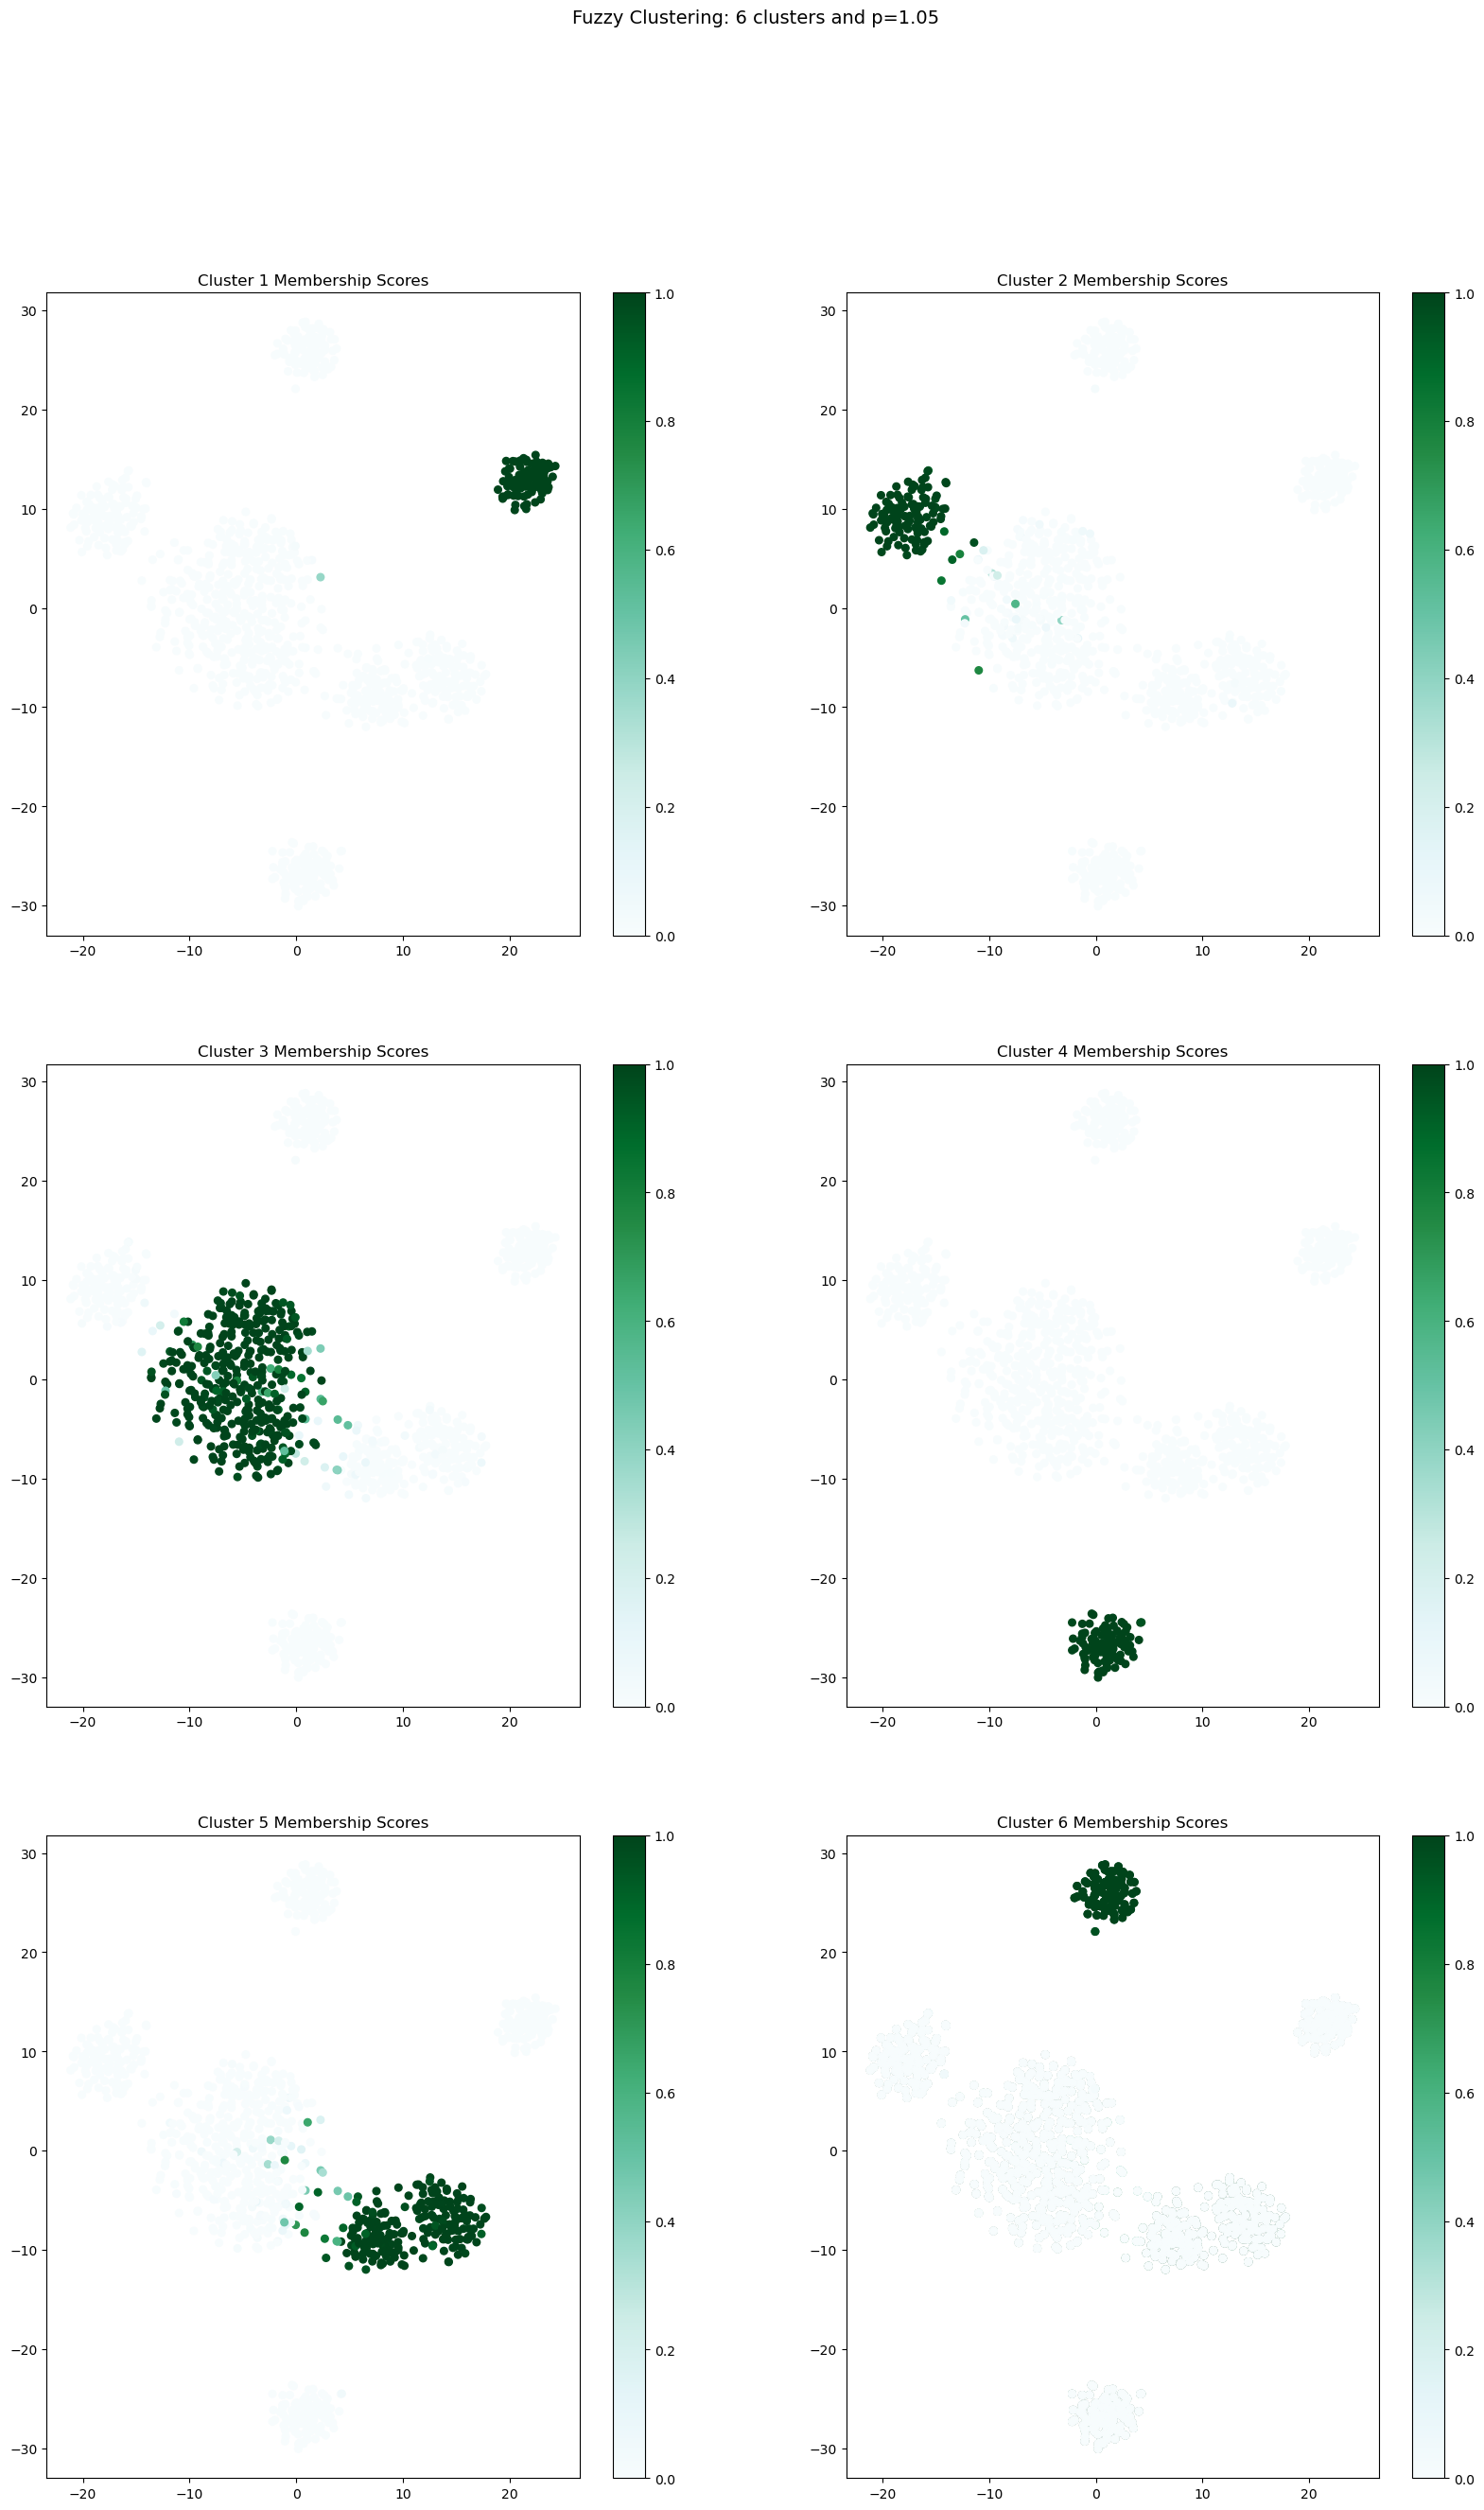

In [14]:
c=6
p=1.05

centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(X_original.T, c=c, m=p, error=1e-6, maxiter=20000, seed=123)

#Color code t-SNE Plots
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,6):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/2)),int(i%2)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/2)),int(i%2)])
    ax[int(np.floor(i/2)),int(i%2)].set_title('Cluster %s Membership Scores'%(str(i+1)))
plt.show()

##### p = 1.1

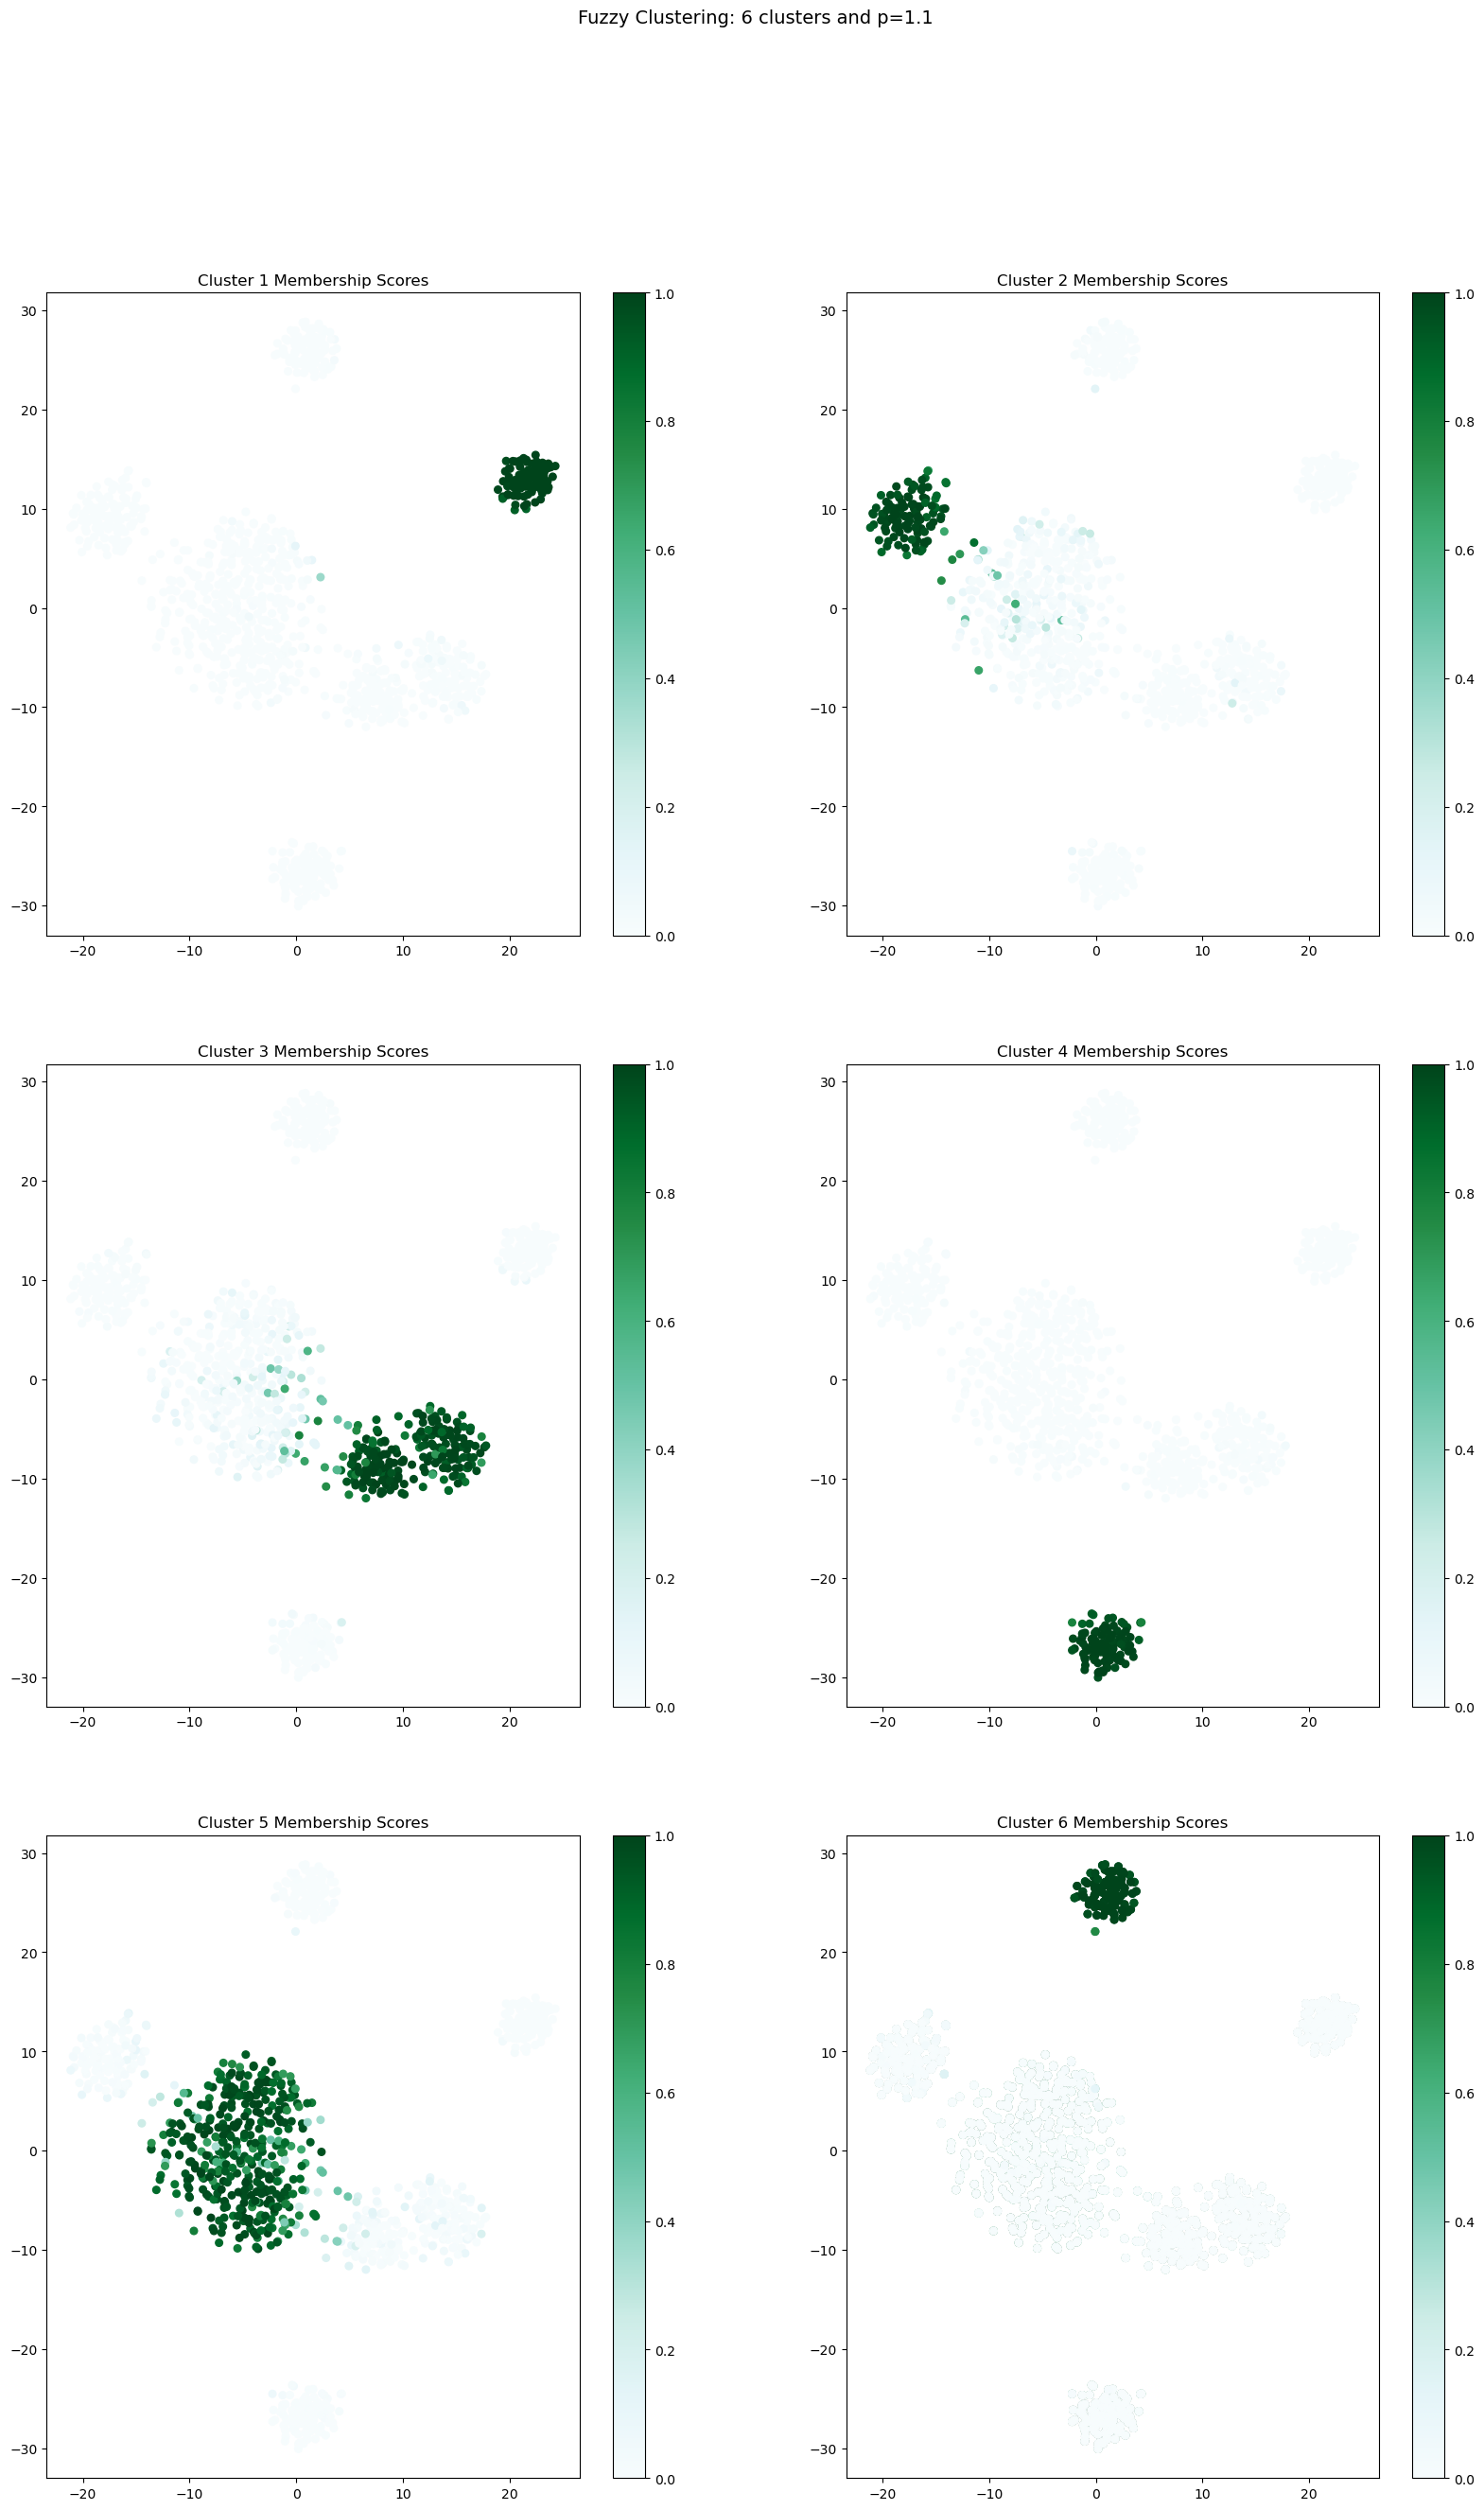

In [15]:
c=6
p=1.1

centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(X_original.T, c=c, m=p, error=1e-6, maxiter=20000, seed=123)

#Color code t-SNE Plots
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,6):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/2)),int(i%2)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/2)),int(i%2)])
    ax[int(np.floor(i/2)),int(i%2)].set_title('Cluster %s Membership Scores'%(str(i+1)))
plt.show()

##### p = 1.5

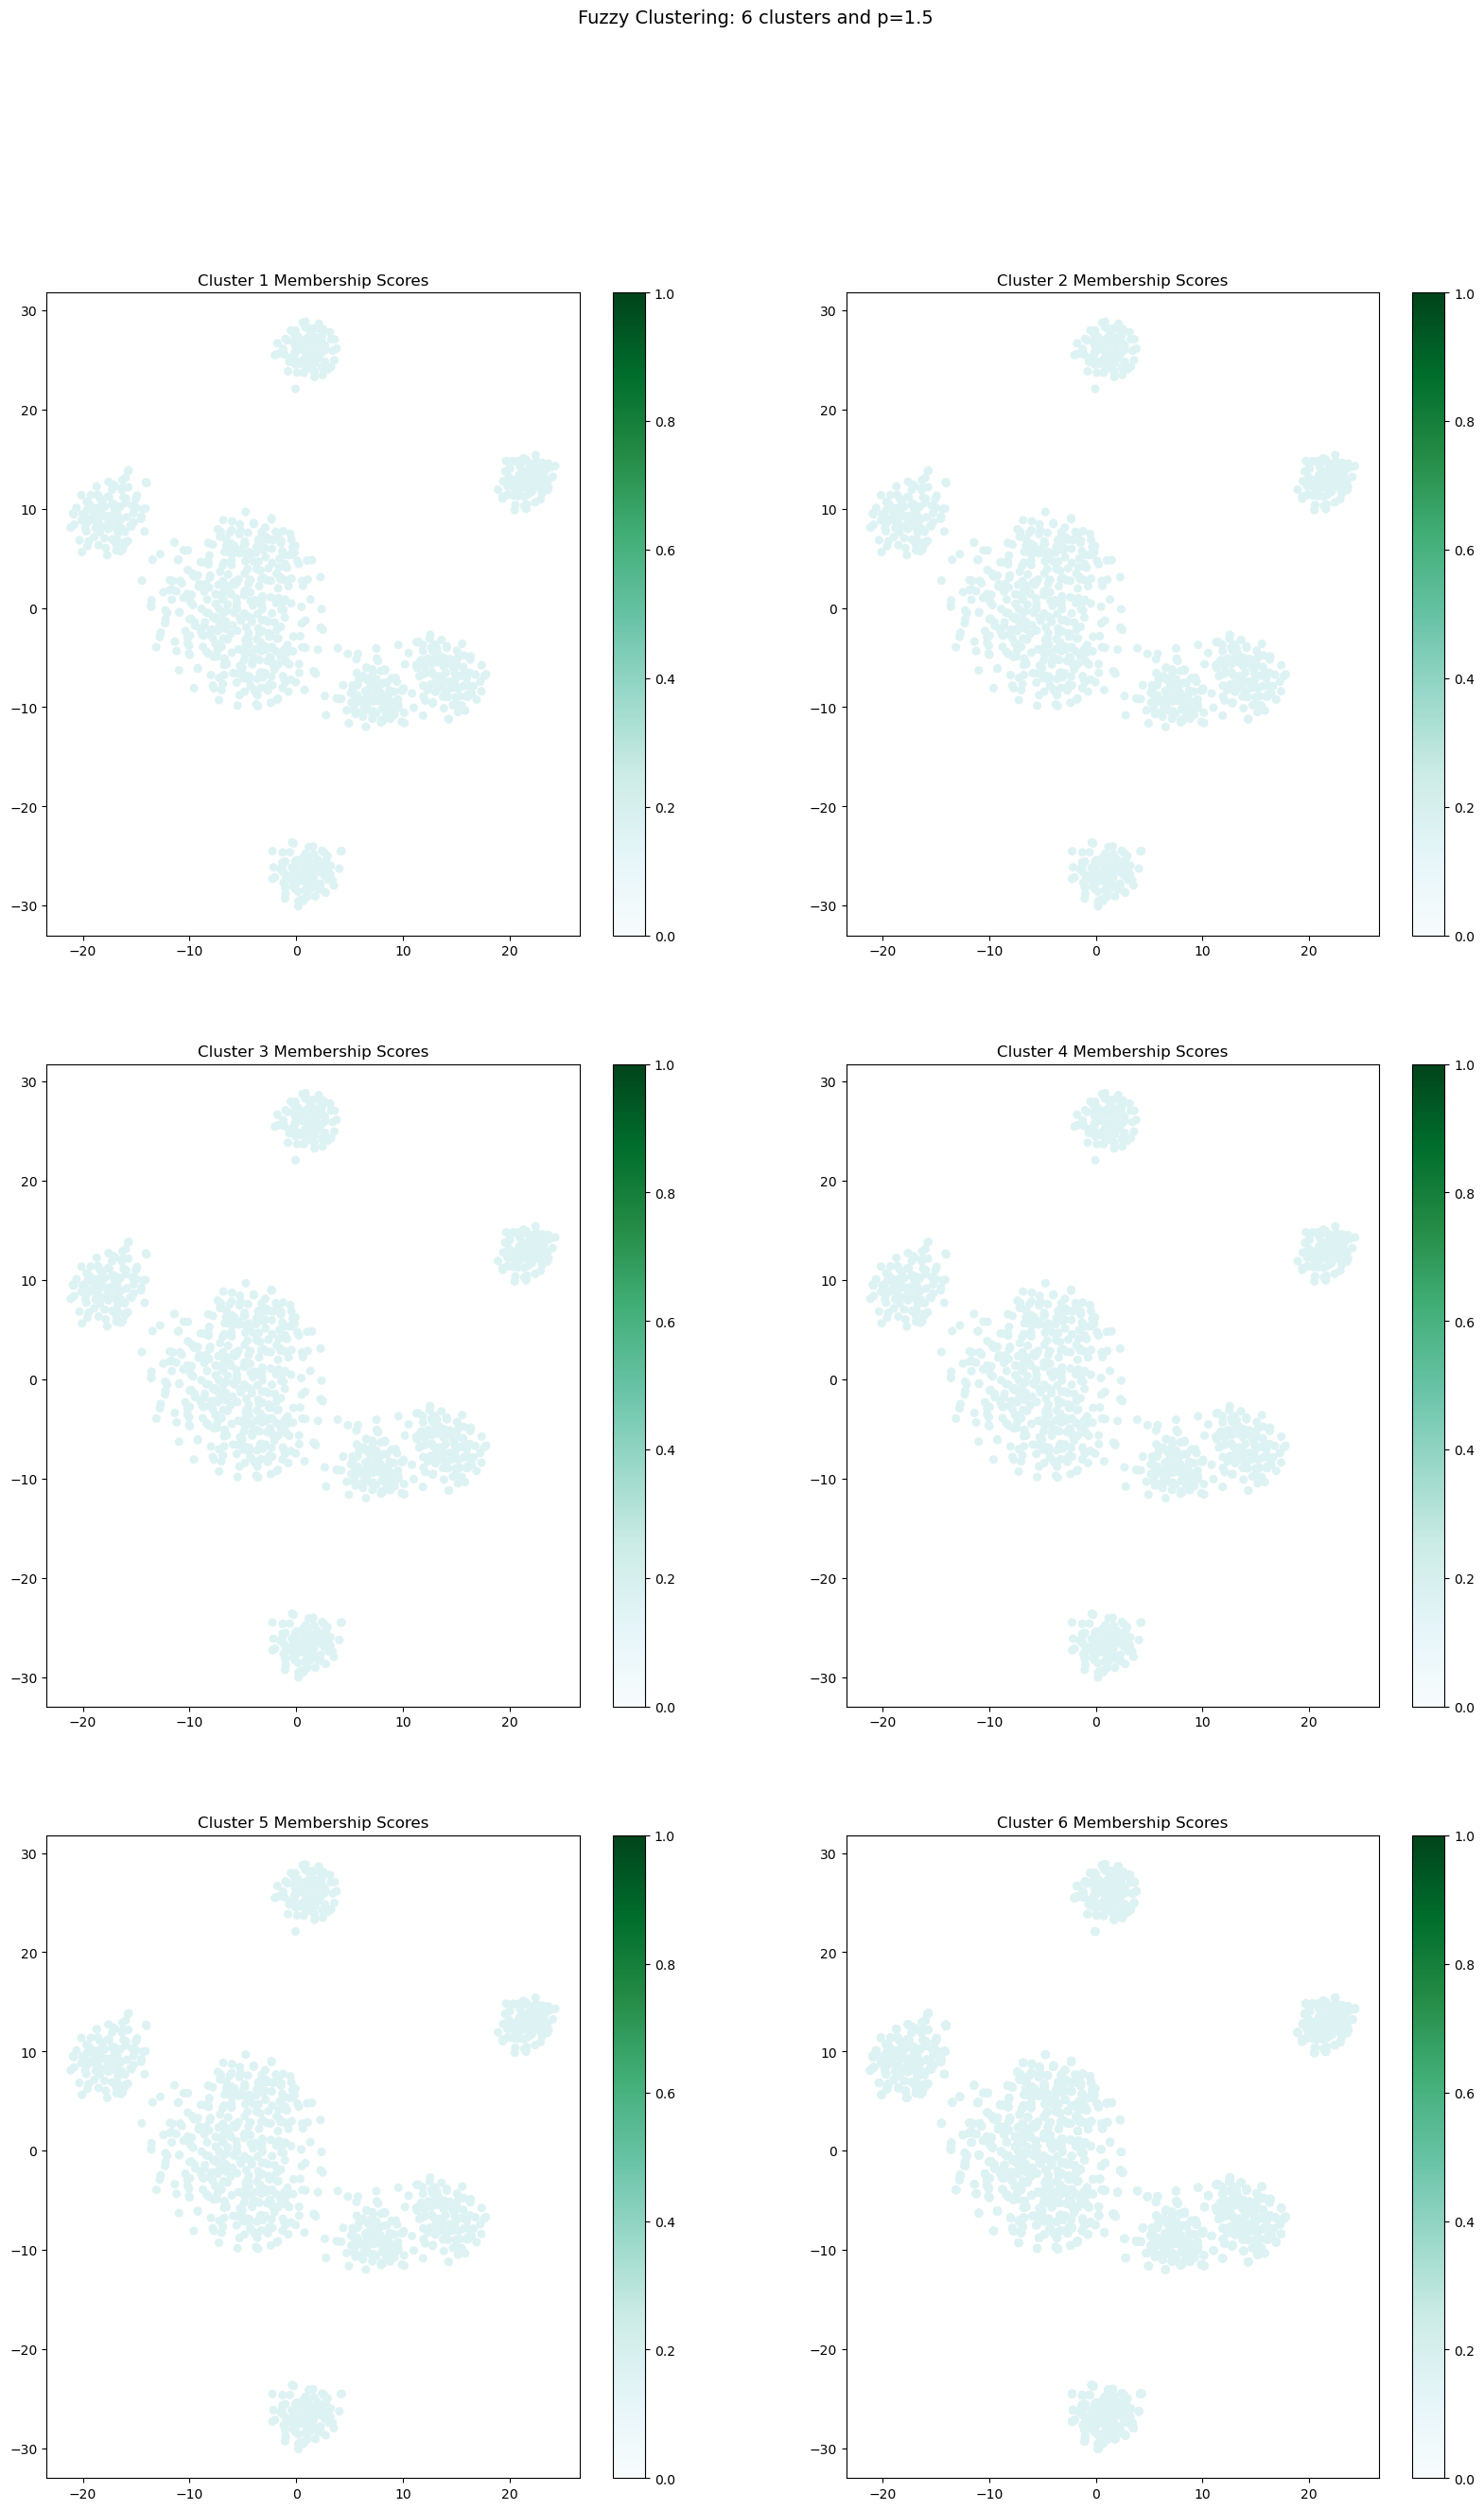

In [16]:
c=6
p=1.5

centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(X_original.T, c=c, m=p, error=1e-6, maxiter=20000, seed=123)

#Color code t-SNE Plots
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,6):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/2)),int(i%2)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/2)),int(i%2)])
    ax[int(np.floor(i/2)),int(i%2)].set_title('Cluster %s Membership Scores'%(str(i+1)))
plt.show()

#### Average image based on fuzzy c-means

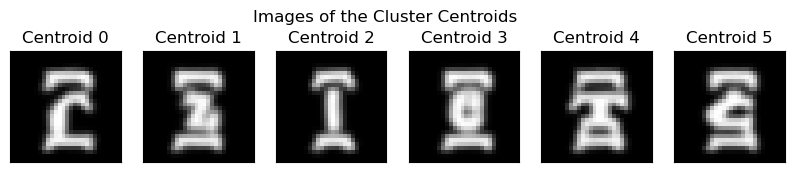

In [17]:
centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(X_original.T, c=6, m=1.05, error=1e-6, maxiter=20000, seed=100)

fig, ax = plt.subplots(1, 6, figsize=(10, 2))
plt.suptitle('Images of the Cluster Centroids')

for j in range(0,6):
    #Turn the centroids into a dataframe
    df_centroids=pd.DataFrame(centroids, columns=X_original.columns)
    #First, reshape the flattened 784 pixel array into an 28-by-28 numpy array and unscale the data (ie. multiply by 255)
    object_image = np.array(df_centroids.iloc[j]).reshape((28, 28))*255

    #Then show the image
    ax[j].imshow(object_image, cmap='gray')
    ax[j].grid(False)
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].set_title('Centroid %s'%str(j))
plt.show()

### clustering Algorithm 2: K-Means

#### elbow plot of K-Means: There is an obvious elbow at k=6.

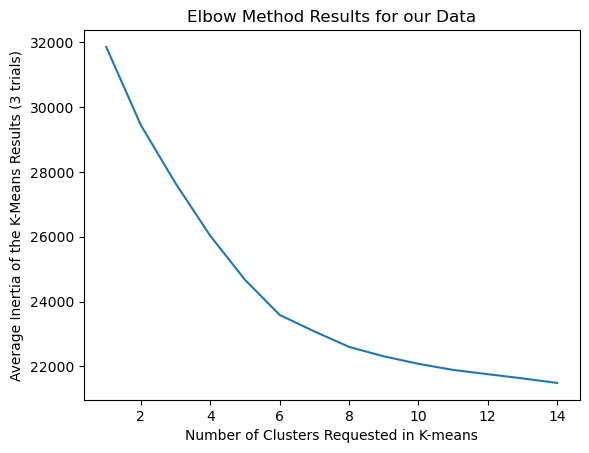

In [18]:
cluster_num_list=range(1,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X_original)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for our Data')
plt.show()

#### clustering the data

In [19]:
df_copy_2 = df_copy.copy()
kmeans = KMeans(n_clusters=6, random_state=100).fit(X_original)
df_copy_2['predicted_cluster']=kmeans.labels_
df_copy_2.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label,predicted_cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3


#### t-SNE plot

In [20]:
tsne = TSNE(n_components=2, perplexity=50, random_state=123)
data_tsne = tsne.fit_transform(X_original)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df_copy_2, df_tsne], axis=1)
df_combo

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label,predicted_cluster,x,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,2,-18.417463,11.095155
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,-6.074015,4.781730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,2,-16.894150,9.578834
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,1,1.989365,-25.330502
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3,-8.105542,3.046021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,2,-15.774959,13.785980
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,1,-1.051883,-29.284048
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,0,19.837820,11.441961
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,2,-18.600243,11.403155


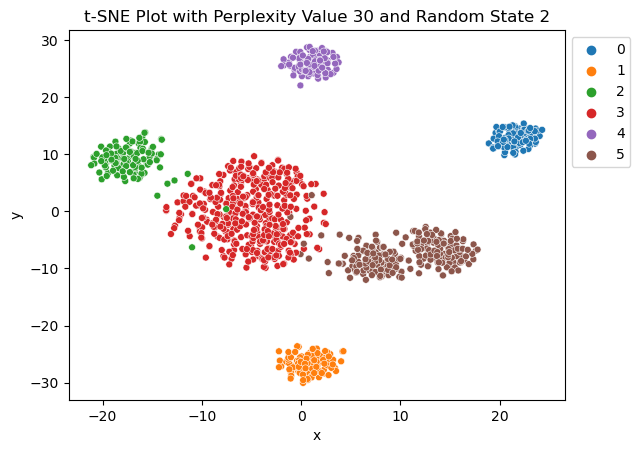

In [21]:
palette = sns.color_palette("tab10")  
sns.scatterplot(x='x', y='y', hue='predicted_cluster', data=df_combo, s=25, alpha=1, palette=palette)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' % (30, 2))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

For n_clusters = 6 The average silhouette_score is : 0.12049462192586025


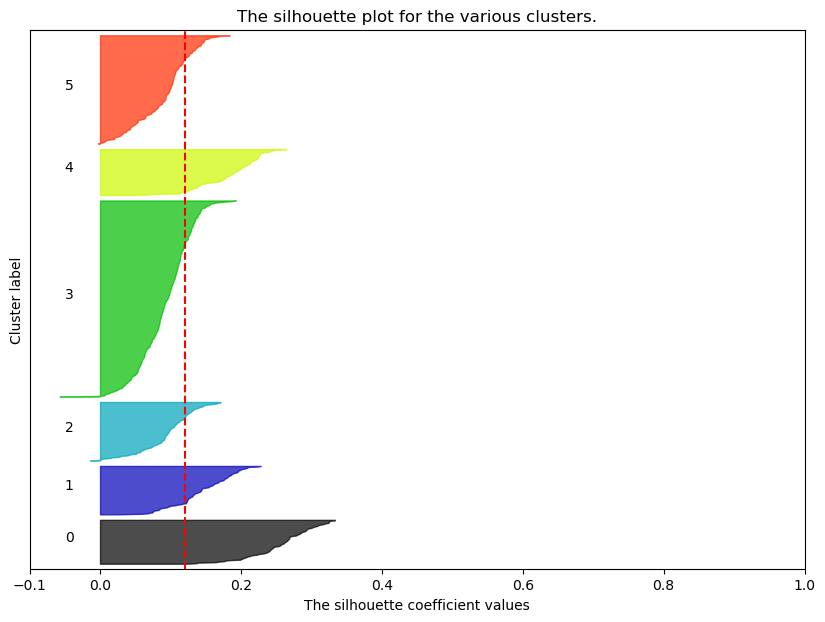

In [22]:
# silhouette score
def show_silhouette_plots(X, cluster_labels):
    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm

    n_clusters = len(np.unique(cluster_labels))

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

    return

show_silhouette_plots(X_original,df_copy_2['predicted_cluster'])

#### Average image based on K-Means

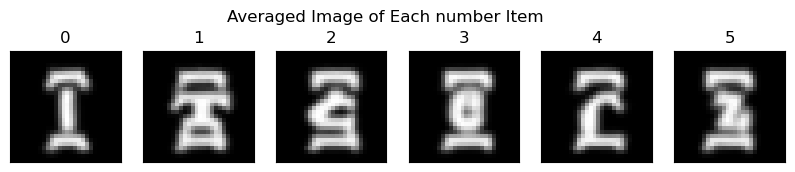

In [24]:
num_list_1=df_copy_2['predicted_cluster'].drop_duplicates()

df_item_averages=df_copy_2.drop(['label'],axis=1).groupby(['predicted_cluster']).mean()

#Set up the plot
i=0
fig, ax = plt.subplots(1, 6, figsize=(10, 2))
plt.suptitle('Averaged Image of Each number Item')

for num in sorted(list(num_list_1)):
    #First, reshape the flattened 784 pixel array into an 28-by-28 numpy array and unscale the data (ie. multiply by 255)
    object_image = np.array(df_item_averages.loc[num]).reshape((28, 28))*255

    #Then show the image
    ax[i].imshow(object_image, cmap='gray')
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(num))
    
    i+=1
plt.show()

#### Adjusted Random Score

In [25]:
#K-Means
kmeans=KMeans(n_clusters=6, random_state=100).fit(X_original)
df['predicted_cluster']=kmeans.labels_
adjusted_rand_score(df['predicted_cluster'], df['label'])

0.5101238821297055

In [26]:
#Fuzzy c-means
centroids, W, W_0, dist_maat, history, iters, ndpc = cmeans(X_original.T, c=6, m=1.05, error=1e-6, maxiter=20000, seed=100)
W_new = pd.DataFrame(W).T
W_df = pd.DataFrame(W.T)
W_df['predicted_cluster'] = W_df.apply(lambda row: row.argmax(), axis=1)
adjusted_rand_score(W_df['predicted_cluster'], df['label'])

0.5085806470907352